In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# import math
import math

# Import sns
import seaborn as sns


In [5]:
df = pd.read_csv('TaxiFare.csv')

df['distance']=((df['latitude_of_pickup']-df['latitude_of_dropoff'])**2+(df['longitude_of_pickup']-df['longitude_of_dropoff'])**2)**0.5
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], format='%Y-%m-%d %H:%M:%S UTC')
df['hour_of_day'] = df['date_time_of_pickup'].dt.hour
df['month'] = df['date_time_of_pickup'].dt.month
df['hour'] = df['date_time_of_pickup'].dt.hour
df['dayofweek'] = df['date_time_of_pickup'].dt.dayofweek
# Select the relevant features
X = df[['amount', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',  'hour_of_day', 'month', 'hour', 'dayofweek']]
y = df['distance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[['amount', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff']] = scaler.fit_transform(X_train[['amount', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff']])
X_test[['amount', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff']] = scaler.transform(X_test[['amount', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff']])


In [39]:
# Train the AdaBoost regression model
regr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42)
regr.fit(X_train, y_train)


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=100, random_state=42)

In [4]:
# Predict on the test set
y_pred = regr.predict(X_test)


In [5]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.17807013361399107


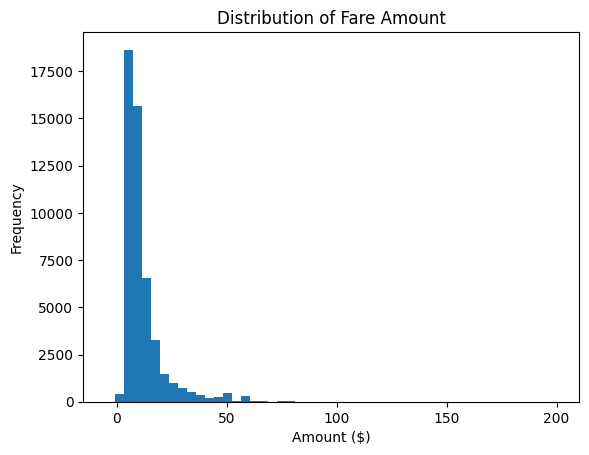

In [6]:
# Plotting the distribution of amount
import matplotlib.pyplot as plt


plt.hist(df["amount"], bins=50)
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Fare Amount")
plt.show()





In [12]:
# find distance
df['distance']=((df['latitude_of_pickup']-df['latitude_of_dropoff'])**2+(df['longitude_of_pickup']-df['longitude_of_dropoff'])**2)**0.5

In [14]:
df.dtypes

unique_id                       object
amount                         float64
date_time_of_pickup     datetime64[ns]
longitude_of_pickup            float64
latitude_of_pickup             float64
longitude_of_dropoff           float64
latitude_of_dropoff            float64
no_of_passenger                  int64
distance                       float64
hour_of_day                      int64
month                            int64
hour                             int64
dayofweek                        int64
dtype: object

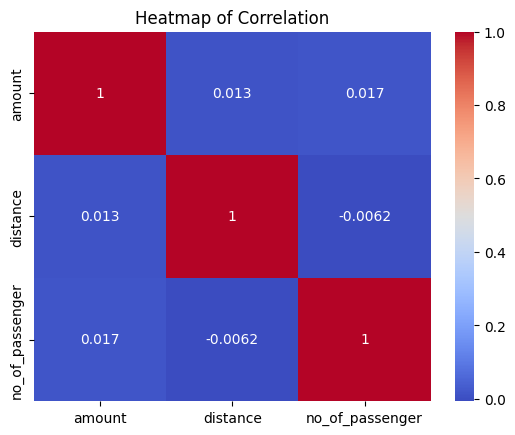

In [15]:
sns.heatmap(df[["amount", "distance", "no_of_passenger"]].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap of Correlation")
plt.show()

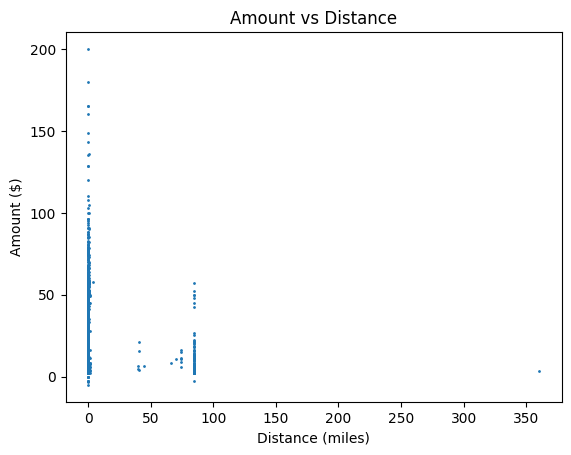

In [18]:
# Plotting the scatter plot of amount vs distance
plt.scatter(df["distance"], df["amount"], s=1)
plt.xlabel("Distance (miles)")
plt.ylabel("Amount ($)")
plt.title("Amount vs Distance")
plt.show()


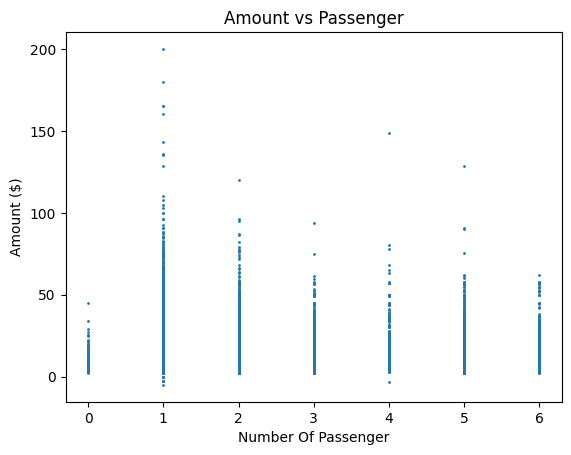

In [24]:
# Plotting the scatter plot of amount vs duration
plt.scatter(df["no_of_passenger"], df["amount"], s=1)
plt.xlabel("Number Of Passenger")
plt.ylabel("Amount ($)")
plt.title("Amount vs Passenger")
plt.show()


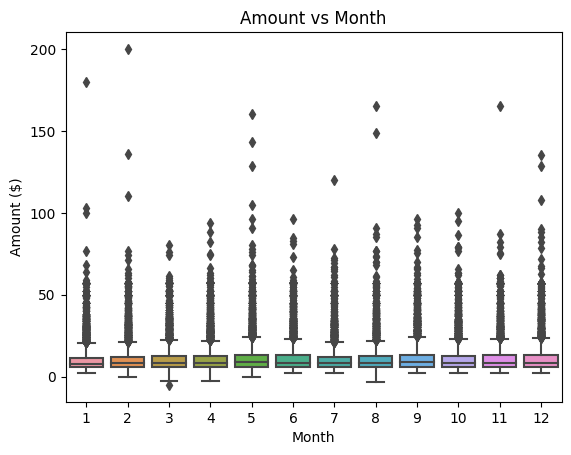

In [26]:
# Plotting the boxplot of amount vs month
sns.boxplot(x="month", y="amount", data=df)
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.title("Amount vs Month")
plt.show()


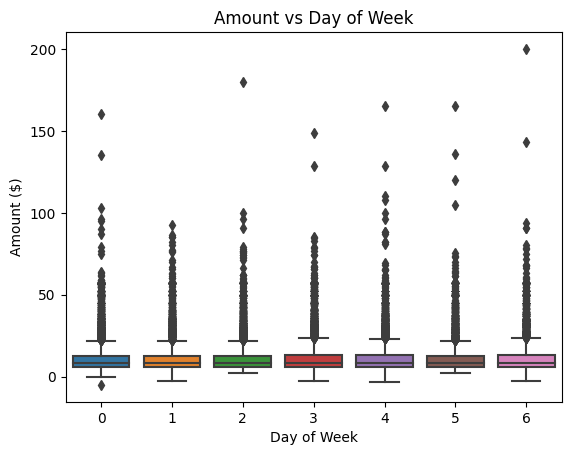

In [29]:
# Plotting the boxplot of amount vs day of week
sns.boxplot(x="dayofweek", y="amount", data=df)
plt.xlabel("Day of Week")
plt.ylabel("Amount ($)")
plt.title("Amount vs Day of Week")
plt.show()


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

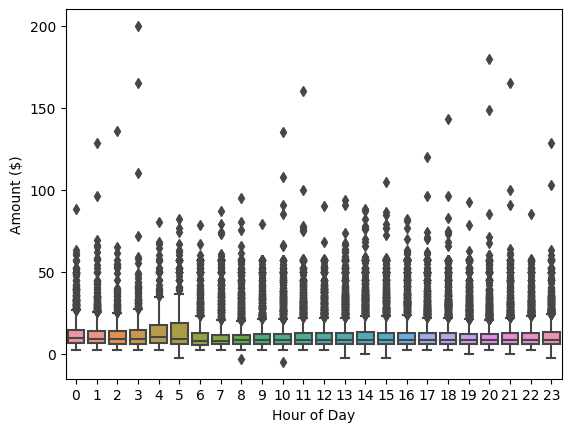

In [30]:
# Plotting the boxplot of amount vs hour of day
sns.boxplot(x="hour_of_day", y="amount", data=df)
plt.xlabel("Hour of Day")
plt.ylabel("Amount ($)")
plt.title


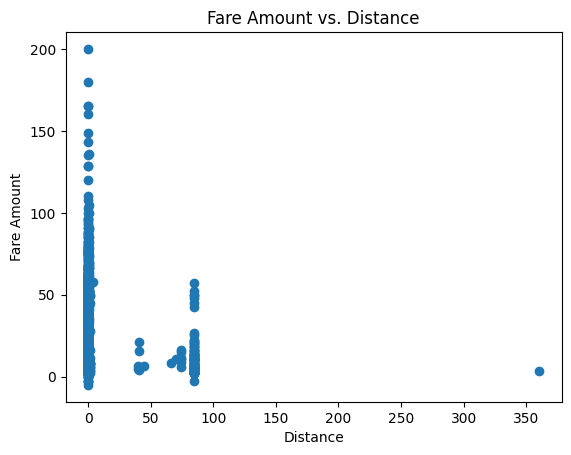

In [32]:
plt.scatter(df['distance'], df['amount'])
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.title('Fare Amount vs. Distance')
plt.show()


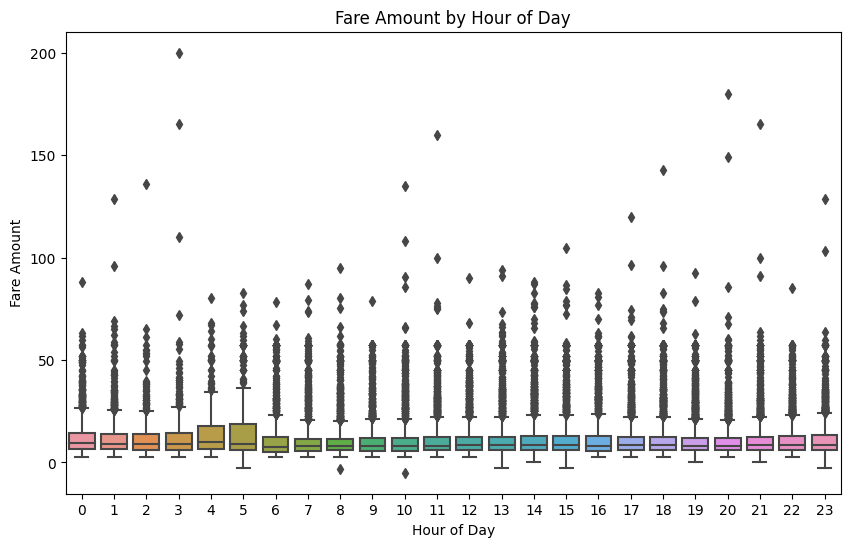

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='hour_of_day', y='amount', data=df)
plt.xlabel('Hour of Day')
plt.ylabel('Fare Amount')
plt.title('Fare Amount by Hour of Day')
plt.show()


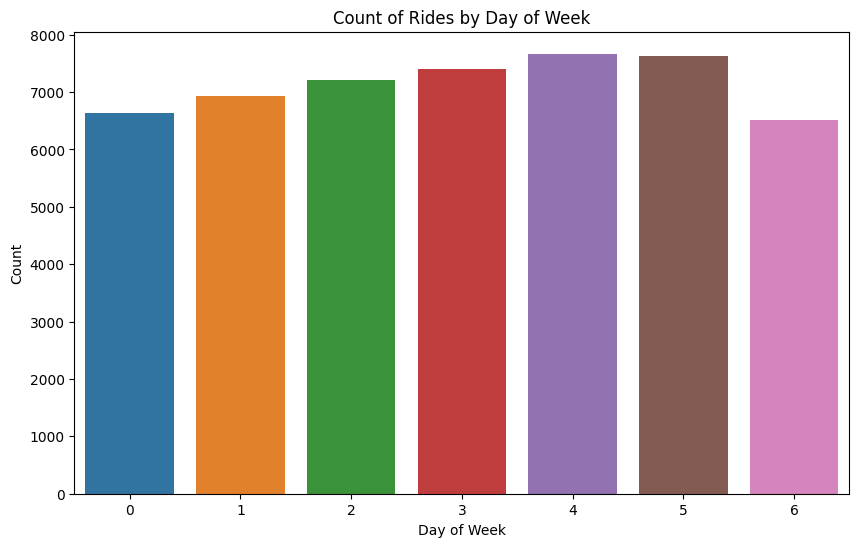

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='dayofweek', data=df)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Count of Rides by Day of Week')
plt.show()


In [40]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculate the mean squared error for both training and test data
train_score = mean_squared_error(y_train, y_train_pred)
test_score = mean_squared_error(y_test, y_test_pred)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.00782269171660029
Test Score: 0.17807013361399107
